<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli. Adapted for CECS APML and PR by Arash Sarshar. Shared under the same licenses.</td>
 <td> </td>
</table>

# Feedforward Neural Networks

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [3]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [7]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [11]:
x,y = next(iter(train_loader))

In [15]:
x.shape, y.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

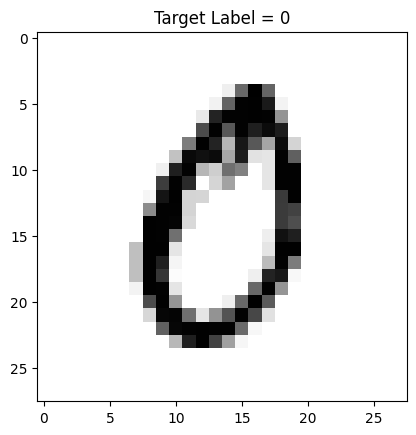

In [29]:
idx = 2
plt.imshow(x[idx,0,:,:], cmap='Greys')
plt.title('Target Label = {}'.format(y[idx].numpy()));

In [ ]:
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()

        # Non-linearity
        self.activation = nn.Sigmoid()
        
        # Input Layer 
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        
        # Hidden Layer 
        self.fc2 = nn.Linear(hidden_dim, hidden_dim) 

        # Output Layer 
        self.fc3 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

In [1]:
criterion = nn.CrossEntropyLoss()

NameError: name 'nn' is not defined